In [48]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from mpl_toolkits.mplot3d import Axes3D
from EDMtoolkit import *
from modelSystems import *

In [46]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [26]:
file = "../Datasets/plankton_volume.csv"
data = pd.read_csv(file,encoding="utf-8",na_filter=False)
states = data.to_numpy()
states = states[:,1:].astype(float)

In [75]:
# Preprocessing Idea 1: convolve the data using a normal distribution
# problem - data becomes TOO smooth and the autocorrelation is very high

kernelLen = 51
kernel = norm.pdf(np.linspace(-5,5,num=kernelLen), loc=0, scale=1)


Xr = np.sqrt(np.convolve(states[:,2], kernel,mode='same')).reshape((states.shape[0],1))

# Preprocessing Idea 2: just bin it

In [76]:
kernel

array([1.48671951e-06, 3.96129909e-06, 1.01408521e-05, 2.49424713e-05,
       5.89430678e-05, 1.33830226e-04, 2.91946926e-04, 6.11901930e-04,
       1.23221917e-03, 2.38408820e-03, 4.43184841e-03, 7.91545158e-03,
       1.35829692e-02, 2.23945303e-02, 3.54745928e-02, 5.39909665e-02,
       7.89501583e-02, 1.10920835e-01, 1.49727466e-01, 1.94186055e-01,
       2.41970725e-01, 2.89691553e-01, 3.33224603e-01, 3.68270140e-01,
       3.91042694e-01, 3.98942280e-01, 3.91042694e-01, 3.68270140e-01,
       3.33224603e-01, 2.89691553e-01, 2.41970725e-01, 1.94186055e-01,
       1.49727466e-01, 1.10920835e-01, 7.89501583e-02, 5.39909665e-02,
       3.54745928e-02, 2.23945303e-02, 1.35829692e-02, 7.91545158e-03,
       4.43184841e-03, 2.38408820e-03, 1.23221917e-03, 6.11901930e-04,
       2.91946926e-04, 1.33830226e-04, 5.89430678e-05, 2.49424713e-05,
       1.01408521e-05, 3.96129909e-06, 1.48671951e-06])

<IPython.core.display.Javascript object>


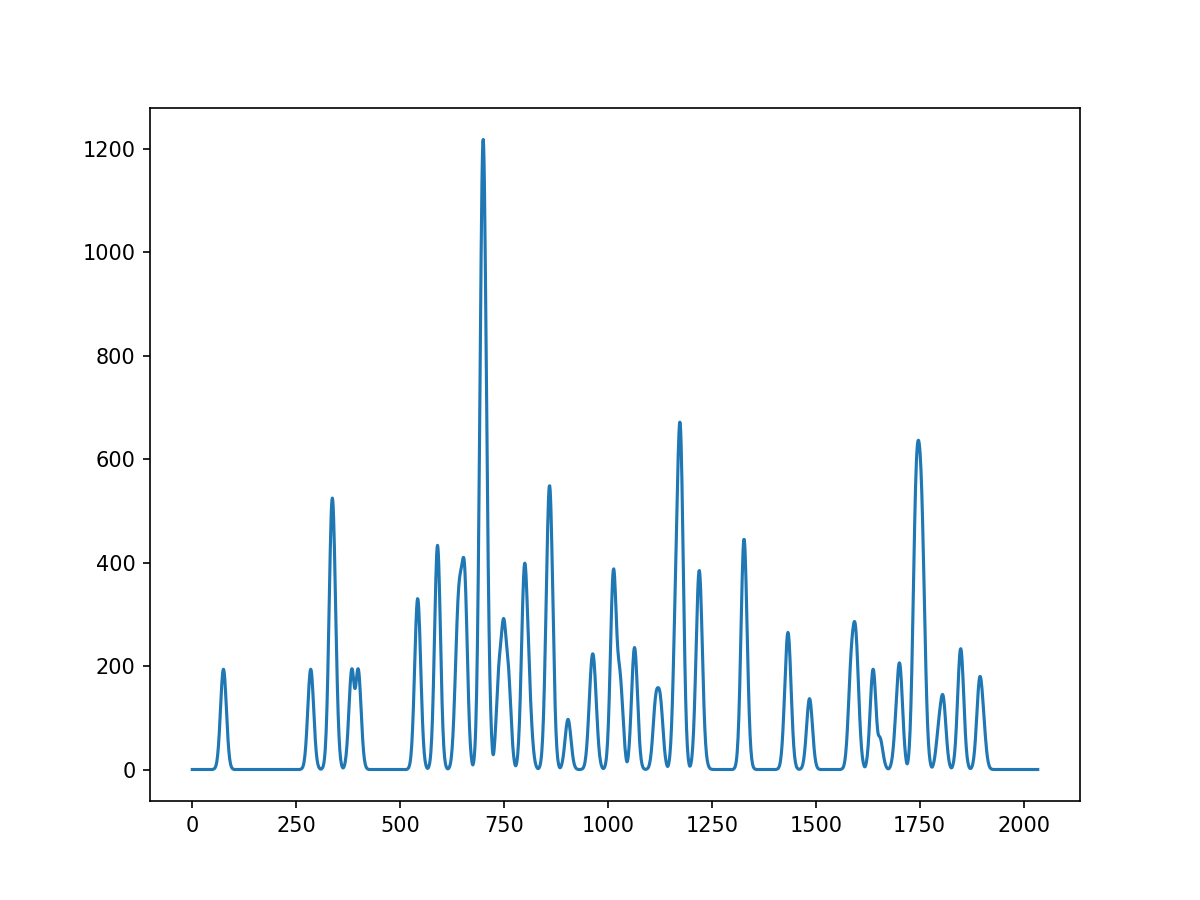

In [90]:
fig, ax = plt.subplots(1,figsize=(8,6))
ax.plot(Xr)

In [85]:
Xr.shape

(2035, 1)

<IPython.core.display.Javascript object>


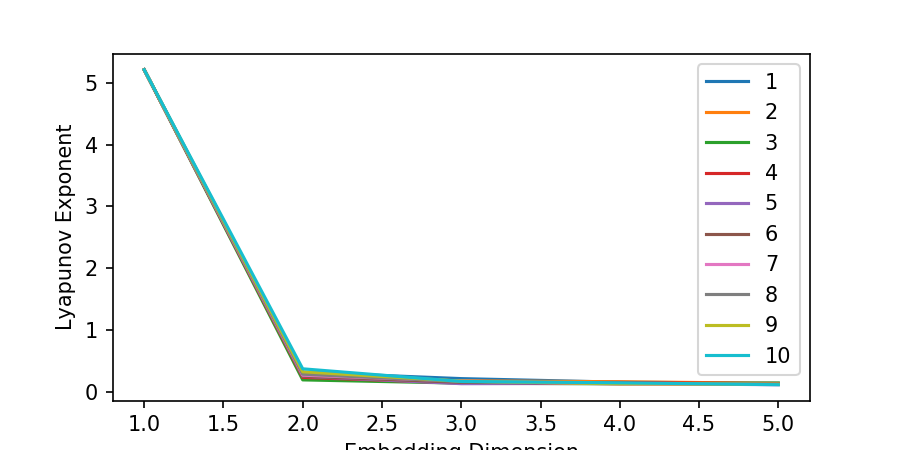

In [91]:
FNNplot(Xr, st=10, l=4)

(2035, 1)

<IPython.core.display.Javascript object>


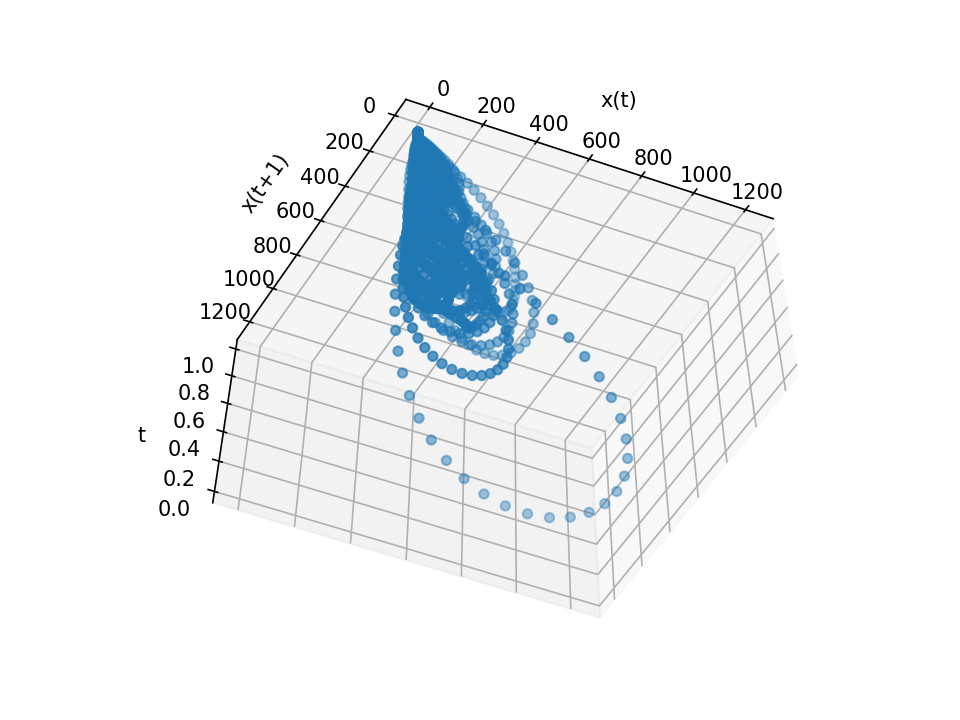

In [89]:
poincareT(Xr,step=5)

In [94]:
X, Y, tx = delayEmbed(Xr, 3, 2, 3, t=np.linspace(0,1,num=Xr.shape[0]))

<IPython.core.display.Javascript object>


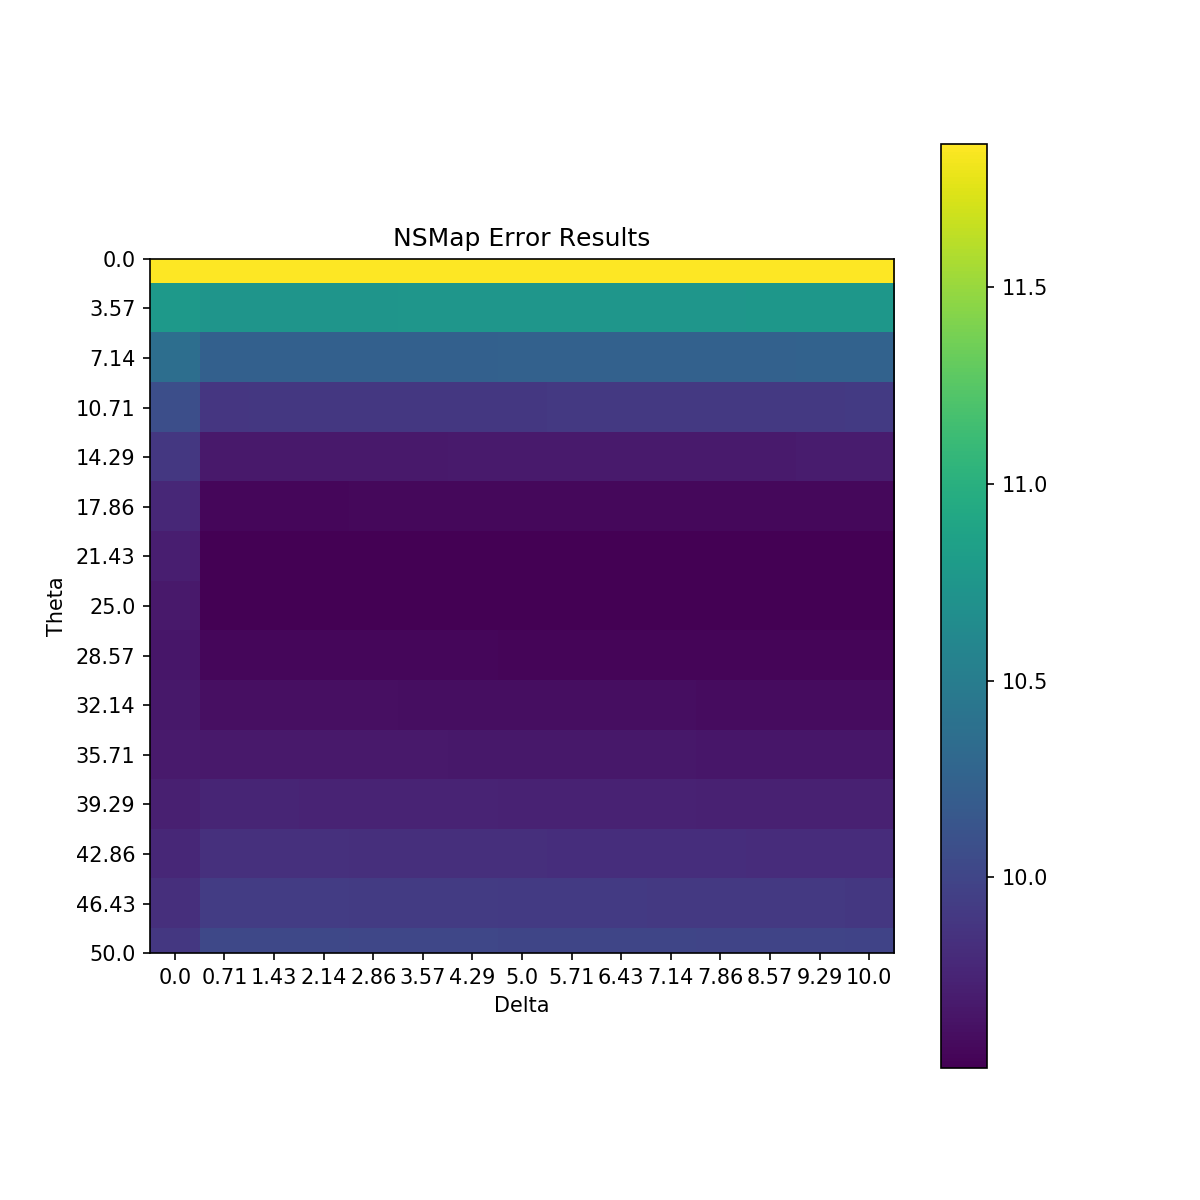

Min SMap Error: 15658.639733376745, Min NSMap Error: 13559.83375589662
Improvement of NSMap: 1.1547810994782617


(25.0, 10.0, array([[142098.2841347 , 141261.26650196, 141260.97155554,
         141260.67637253, 141260.38095279, 141260.0852965 ,
         141259.78940417, 141259.49327657, 141259.1969148 ,
         141258.9003202 , 141258.60349433, 141258.30643903,
         141258.00915635, 141257.71164852, 141257.413918  ],
        [ 47721.7576166 ,  46168.58409734,  46229.50375497,
          46290.38888099,  46351.23907726,  46412.05394645,
          46472.83309214,  46533.5761189 ,  46594.28263237,
          46654.95223934,  46715.58454784,  46776.1791672 ,
          46836.73570812,  46897.25378278,  46957.73300487],
        [ 31585.05154955,  27771.63886809,  27814.43449697,
          27857.18543191,  27899.89145306,  27942.55235841,
          27985.16796328,  28027.73809989,  28070.2626169 ,
          28112.74137897,  28155.17426629,  28197.56117419,
          28239.90201262,  28282.19670581,  28324.44519177],
        [ 23930.3654088 ,  19741.24060631,  19772.37922107,
          19803.55570732,

In [95]:
thetas = np.linspace(0, 50, num=5)
deltas = np.linspace(0, 10, num=5)

GMapOptimize(X, Y, tx, thetas, deltas)

<IPython.core.display.Javascript object>


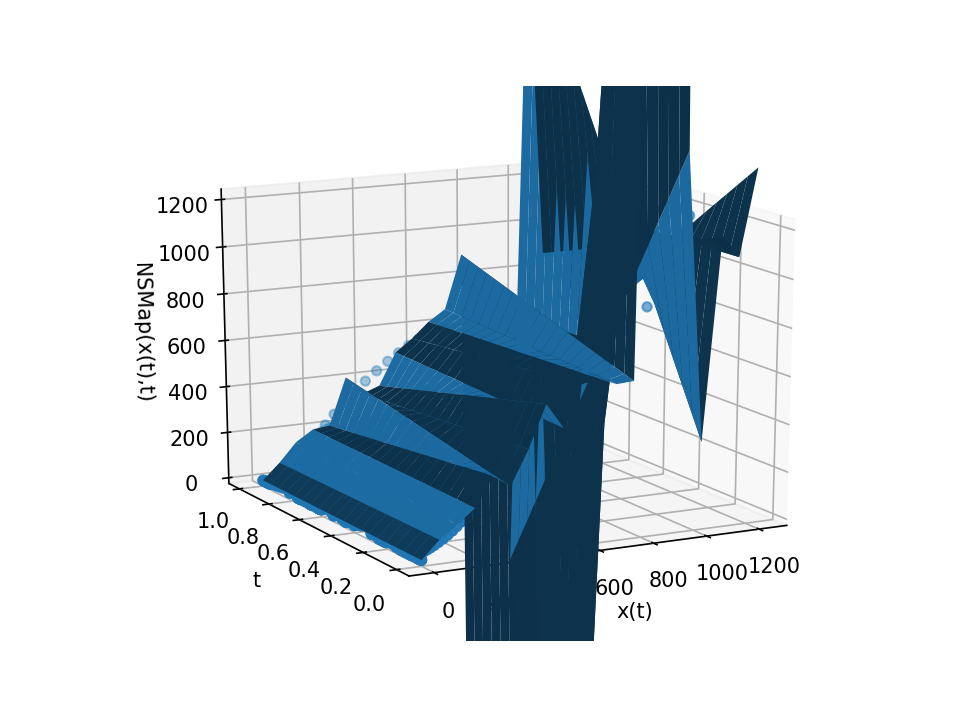

In [102]:
functionSurfaceNSMap(Xr, 3, 25, 0.71, 20)